In [23]:
import numpy as np
import tensorflow as tf

In [24]:
def sigmoid(inX):
    return 1.0/(1+np.exp(-inX))

In [34]:
def train_models(features, labels, learning_rate, iterations):
    M, N = features.shape
    X = tf.placeholder(dtype = tf.float32, shape = [None, N], name ='input_feature')
    Y = tf.placeholder(dtype = tf.float32, shape = [None], name = 'label')
    W = tf.Variable(tf.random_normal([N, 1], stddev=0.05) ,dtype = tf.float32, name = "weight")
    b = tf.Variable(tf.random_normal([1], stddev = 0.01), name = "bias")
    output = tf.reshape(tf.sigmoid(tf.add(tf.matmul(X, W), b)),[-1])
    L = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = output, labels = Y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(L)
    with tf.Session() as session:
        init = tf.global_variables_initializer()
        session.run(init)
        loss_values = []
        for i in range(iterations):
            _, loss = session.run([optimizer, L], feed_dict = {X: features, Y: labels})
            loss_values.append(loss)
        updated_W, update_b = session.run([W, b],feed_dict = {X: features, Y: labels})
    return [loss_values, updated_W, update_b]

In [46]:
features = np.random.rand(1000, 10)
w = np.random.rand(10, 1)
b = 0.1
labels = sigmoid(np.dot(features, w) + 0.1)
iterations = 10000
loss_values, update_W, update_b= train_models(features, labels.reshape([-1]), 0.01, iterations)

In [47]:
from matplotlib import pyplot as plt

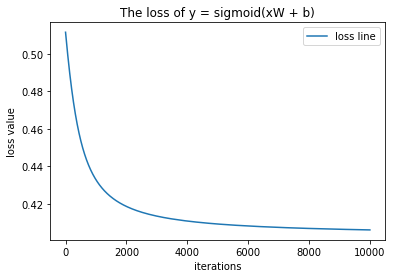

In [60]:
indexs = np.arange(iterations)
# print(len(loss_values))
plt.title("The loss of y = sigmoid(xW + b)")
plt.xlabel("iterations")
plt.ylabel("loss value")
plt.plot(indexs, loss_values,"-", label = "loss line")
plt.legend()